In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset files
 Required file:Kaggle API key "kaggle.json"

In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d retailrocket/ecommerce-dataset
!unzip ecommerce-dataset.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset
License(s): CC-BY-NC-SA-4.0
 99% 287M/291M [00:02<00:00, 90.0MB/s]
100% 291M/291M [00:02<00:00, 109MB/s] 
Archive:  ecommerce-dataset.zip
  inflating: category_tree.csv       
  inflating: events.csv              
  inflating: item_properties_part1.csv  
  inflating: item_properties_part2.csv  


In [ ]:
events = pd.read_csv('/content/events.csv')
category_tree = pd.read_csv('/content/category_tree.csv')
item_properties1 = pd.read_csv('/content/item_properties_part1.csv')
item_properties2 = pd.read_csv('/content/item_properties_part2.csv')

Data exploration:

display data type info

In [ ]:
print('events Information')
events.info()
print('______________________________________')
print('Category Tree Information')
category_tree.info()
print('______________________________________')
print('Item properties part 1 Information')
item_properties1.info()
print('______________________________________')
print('Item properties part 2 Information')
item_properties2.info()

events Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB
______________________________________
Category Tree Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB
______________________________________
Item properties part 1 Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------ 

**search for nullable values**

In [ ]:
print('events Information')
events.isnull().sum()

events Information


,0
timestamp,0
visitorid,0
event,0
itemid,0
transactionid,2733644


In [ ]:
category_tree.isnull().sum()


,0
categoryid,0
parentid,25


noticing that parent id has 25 nullable values which represent root categories

In [ ]:
item_properties1.isnull().sum()

,0
timestamp,0
itemid,0
property,0
value,0


In [ ]:
item_properties2.isnull().sum()

,0
timestamp,0
itemid,0
property,0
value,0


display sample rows

In [ ]:
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [ ]:
category_tree.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [ ]:
item_properties1.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [ ]:
item_properties2.head()

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


# Convert timestamps to datetime

In [ ]:
events['timestamp'] = pd.to_datetime(events['timestamp'], unit='ms')
item_properties1['timestamp'] = pd.to_datetime(item_properties1['timestamp'], unit='ms')
item_properties2['timestamp'] = pd.to_datetime(item_properties2['timestamp'], unit='ms')

# Merge item properties datasets

In [ ]:
item_properties = pd.concat([item_properties1, item_properties2])

display sample data of item_properties

In [ ]:
item_properties.head()

,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 03:00:00,59481,790,n15360.000
4,2015-05-17 03:00:00,156781,917,828513


# Merge category tree with item properties

In [ ]:
item_category = item_properties[item_properties['property'] == 'categoryid'][['itemid', 'value']].astype(int)
item_category.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788214 entries, 0 to 9275879
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   itemid  788214 non-null  int64
 1   value   788214 non-null  int64
dtypes: int64(2)
memory usage: 18.0 MB


In [ ]:
item_category.rename(columns={'value': 'categoryid'}, inplace=True)
item_category.head()

,itemid,categoryid
0,460429,1338
140,281245,1277
151,35575,1059
189,8313,1147
197,55102,47


In [ ]:
category_tree.rename(columns={'categoryid': 'categoryid', 'parentid': 'parent_categoryid'}, inplace=True)
category_tree.head()

,categoryid,parent_categoryid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


# Merge event data with item categories

In [ ]:
events = events.merge(item_category, on='itemid', how='left')
events.head()

,timestamp,visitorid,event,itemid,transactionid,categoryid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,1173.0
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,1231.0
2,2015-06-02 05:13:19.827,111016,view,318965,NaN,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN,914.0
4,2015-06-02 05:02:17.106,951259,view,367447,NaN,1613.0


In [ ]:
events = events.merge(category_tree, left_on='categoryid', right_on='categoryid', how='left')
events.head()

,timestamp,visitorid,event,itemid,transactionid,categoryid,parent_categoryid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,1173.0,805.0
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,1231.0,901.0
2,2015-06-02 05:13:19.827,111016,view,318965,NaN,NaN,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN,914.0,226.0
4,2015-06-02 05:02:17.106,951259,view,367447,NaN,1613.0,250.0


# Fill missing parent categories

In [ ]:
events['parent_categoryid'].fillna('Unknown', inplace=True)

<ipython-input-21-3210182483ea>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  events['parent_categoryid'].fillna('Unknown', inplace=True)
<ipython-input-21-3210182483ea>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  events['parent_categoryid'].fillna('Unknown', inplace=True)


# Exploratory Data Analysis (EDA)

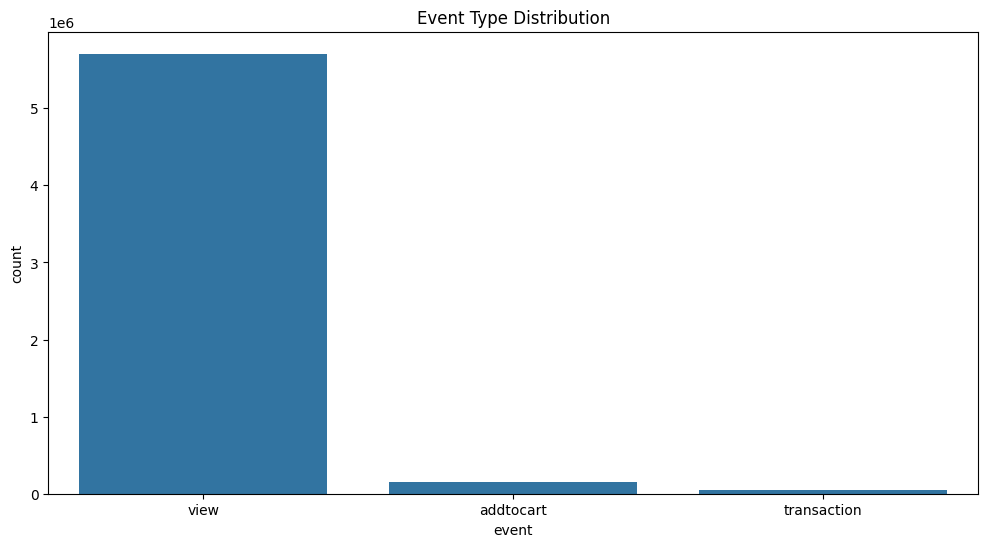

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='event', data=events, order=events['event'].value_counts().index)
plt.title("Event Type Distribution")
plt.show()

# Top viewed, added-to-cart, and purchased products

In [ ]:
view_counts = events[events['event'] == 'view']['itemid'].value_counts().head(10)
addtocart_counts = events[events['event'] == 'addtocart']['itemid'].value_counts().head(10)
purchase_counts = events[events['event'] == 'transaction']['itemid'].value_counts().head(10)

print("Top 10 Viewed Items:\n", view_counts)
print("\nTop 10 Added to Cart Items:\n", addtocart_counts)
print("\nTop 10 Purchased Items:\n", purchase_counts)

Top 10 Viewed Items:
 itemid
320130    23994
354233    17694
133814    15732
247909    14832
158666    13752
359491    13248
15948     12798
291877    11268
316779    10890
378637     9810
Name: count, dtype: int64

Top 10 Added to Cart Items:
 itemid
320130    2538
158666    1224
279457    1134
390591    1116
46156      936
56782      702
113535     612
338427     594
247909     576
37254      558
Name: count, dtype: int64

Top 10 Purchased Items:
 itemid
320130    594
46156     558
316472    252
210087    216
158666    162
210002    162
19883     144
390591    144
461686    133
129279    126
Name: count, dtype: int64


# Save processed data for next notebooks

In [ ]:
events.to_csv('processed_events.csv', index=False)
item_category.to_csv('processed_item_category.csv', index=False)